# Imports

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from stepwise_regression import step_reg;
from estyp.linear_model import LogisticRegression
from scipy.stats import kstest
from sklearn.model_selection import train_test_split
import scikitplot.metrics as skplt
import missingno as msno
import warnings

Link a mi GitHub con el Taller: https://github.com/louisboza/DS_UC_Diplomado/blob/main/Taller_1/Taller_1.ipynb

# Pregunta 1

Cargue la base de datos bike.csv. Realice las siguientes procesos de limpieza:

* Transforme a factor las variables categóricas.
* Transforme las variables temp y atemp a grados celsius, ya que se encuentran en escala normalizada. Use las siguientes fórmulas respectivamente:
    * (47 * temp - 8).
    * (66 * atemp - 16).
* Transforme la variable humedad a porcentaje (multiplique la variable por 100).
* Transforme la velocidad del viento a millas por hora (multiplique por 67 el valor de la variable normalizada).

In [2]:
url1 = 'https://raw.githubusercontent.com/louisboza/DS_UC_Diplomado/main/Taller_1/src/bikes.csv'
df = pd.read_csv(url1)

In [3]:
df.head(5)

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,registered,Target
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1518,1600


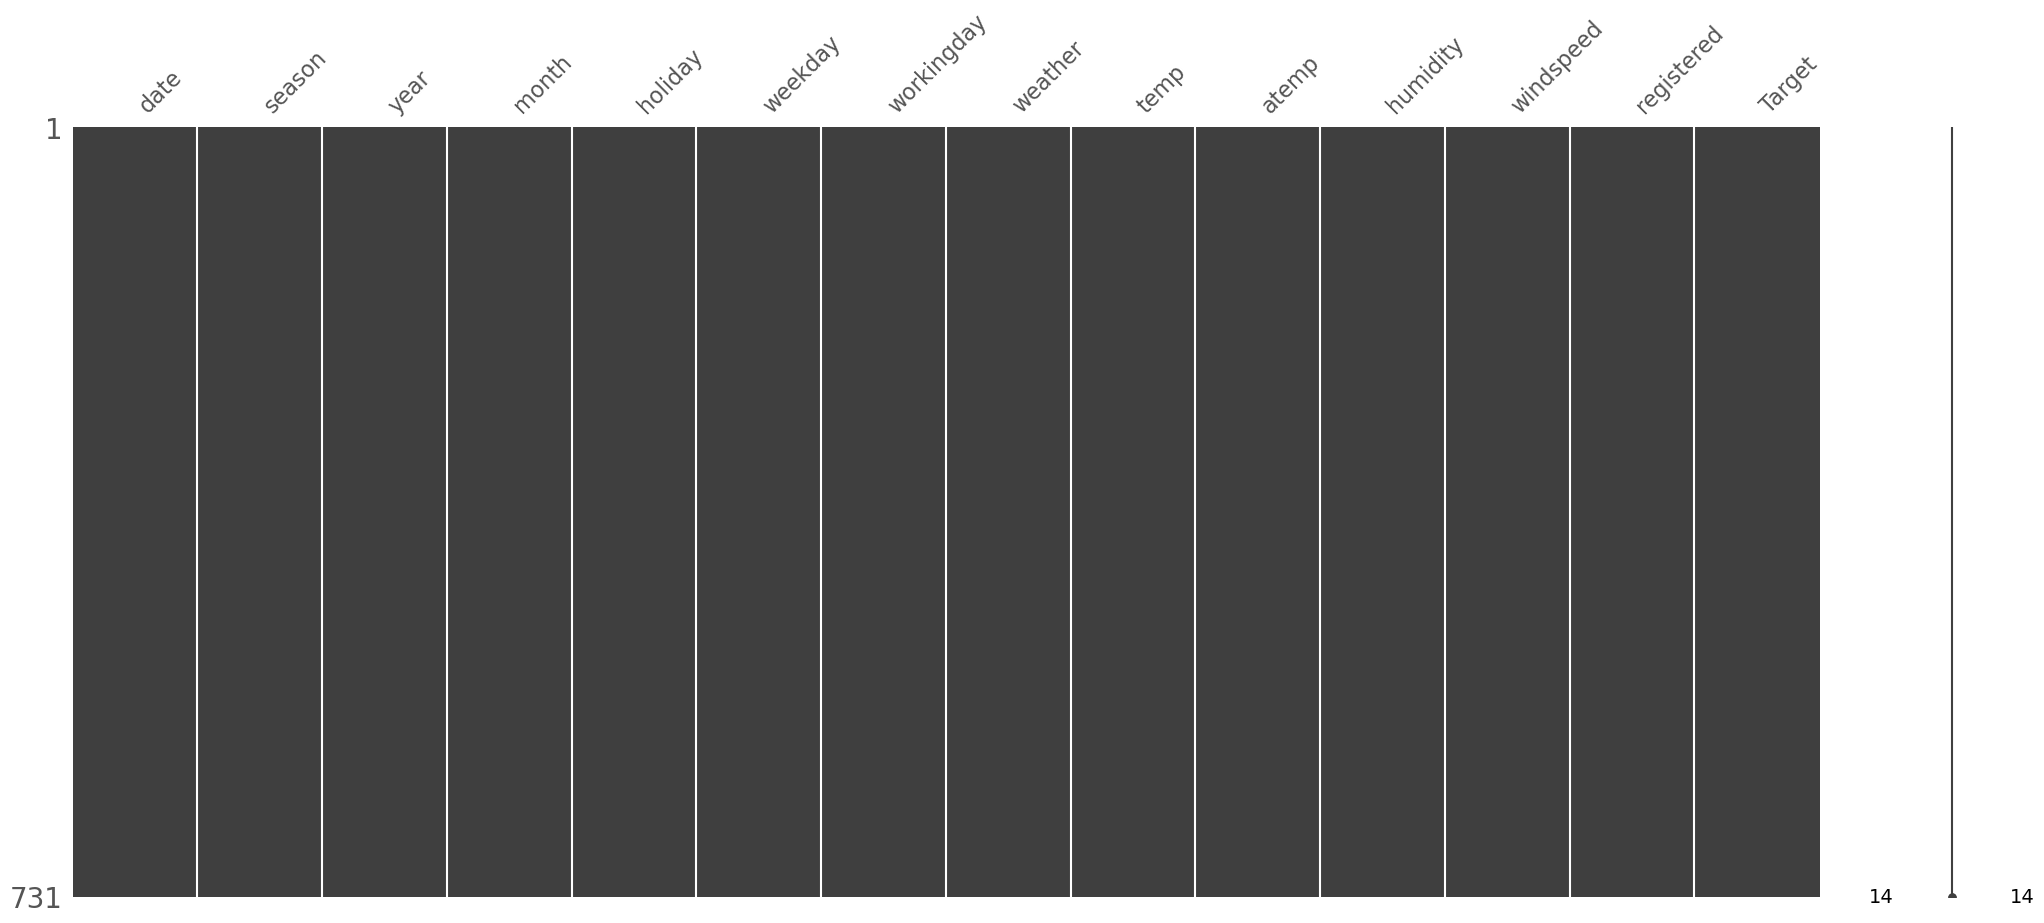

In [73]:
msno.matrix(df)
plt.show();

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['season'] = df['season'].astype(str)
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)
df['holiday'] = df['holiday'].astype(str)
df['weekday'] = df['weekday'].astype(str)
df['workingday'] = df['workingday'].astype(str)
df['weather'] = df['weather'].astype(str)
df['temp'] = (df['temp'] * 47) - 8
df['atemp'] = (df['atemp'] * 66) - 16
df['humidity'] = (df['humidity'] * 100)
df['windspeed'] = (df['windspeed'] * 67)

# Pregunta 2:

Realice un gráfico del número de arriendos de bicicletas vs temperatura, además, añada una curva de regresión lineal. 

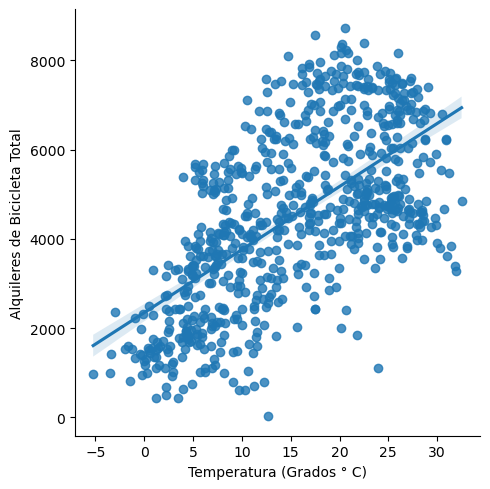

In [5]:
plot_regresion_1 = sns.lmplot(data = df, 
                              y = 'Target', 
                              x = 'temp',
                              palette = "Dark2",)

plot_regresion_1.set_axis_labels("Temperatura (Grados ° C)", "Alquileres de Bicicleta Total")

plt.show();

¿Cuál es la relación entre el número de arriendos con la temperatura?

R: Se observa que existe una tendencia, puesto que a mayor temperatura existe un mayor arriendo total de bicicletas.

# Pregunta 3:

¿Es la relación entre la temperatura y el número de bicicletas arrendadas igual en los dos años?.

R: Si bien se observa la misma tendencia en ambos años, es decir, a mayor temperatura existe un aumento en el arriendo de bicicleteas, en el año 1 la pendiente es más pronunciada, lo que implica que por cada grado en temperatura que aumenta la cantidad de bicicletas arrendadas es mayor que en el año 0.

Realice en un mismo gráfico la relación entre el número de arriendo vs temperatura para los dos años, añada las curvas de regresión lineal.

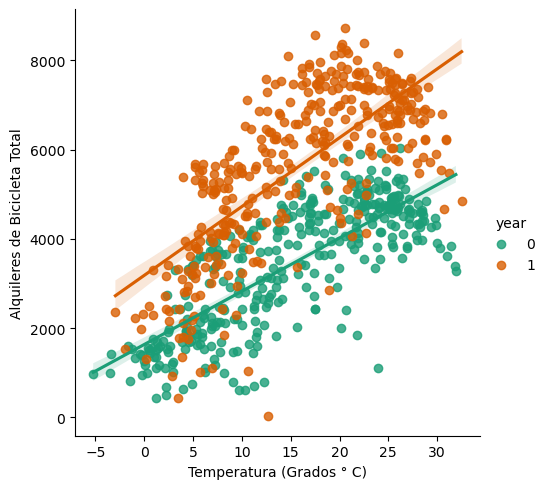

In [6]:
plot_regresion_2 = sns.lmplot(data = df,
                              y = 'Target',
                              x = 'temp',
                              palette = "Dark2",
                              hue = 'year')
plot_regresion_2.set_axis_labels("Temperatura (Grados ° C)", "Alquileres de Bicicleta Total")
plt.show();

# Pregunta 4:


Por selección forward, construya un modelo sin considerar las variables:

* date
* month
* registered

Interpreta el factor asociado a la Temperatura y días feriados.

In [7]:
remove = ['date', 'month', 'registered']
dg = df.drop(remove, axis=1)
dg = pd.get_dummies(dg, drop_first = True, dtype = int)
X = dg.drop('Target', axis=1)
Y = dg['Target']

In [8]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.97e-258
Time:                        10:04:46   Log-Likelihood:                -5927.3
No. Observations:                 731   AIC:                         1.189e+04
Df Residuals:                     713   BIC:                         1.197e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2246.9384    240.702      9.335      0.000    1774.370    2719.507
temp            84.2605     29.510      2.855      0.004      26.324     142.197
atemp           19.1717     22.949      0.835      0.404     -25.883      64.227
humidity       -12.3543      2.944     -4.196      0.000     -18.134      -6.574
windspeed      -40.5147      6.437     -6.294      0.000     -53.152     -27.878
season_2      1136.9785    112.493     10.107      0.000     916.121    1357.836
season_3       854.4831    149.178      5.728      0.000     561.603    1147.363
season_4      1538.9881     95.919     16.045      0.000    1350.671    1727.305
year_1        2017.7533     61.156     32.993      0.000    1897.685    2137.821
holiday_1     -320.6520    168.101     -1.907      0.057    -650.684       9.380
weekday_1     -127.3514     75.589     -1.685      0.092    -275.755      21.053
weekday_2      -40.1262     81.587     -0.492      0.623    -200.306     120.053
weekday_3       30.8555     81.926      0.377      0.707    -129.990     191.701
weekday_4       53.2454     81.077      0.657      0.512    -105.932     212.423
weekday_5       98.3948     81.530      1.207      0.228     -61.672     258.462
weekday_6      442.9183    112.695      3.930      0.000     221.665     664.171
workingday_1   335.6701     70.483      4.762      0.000     197.291     474.049
weather_2     -448.2993     80.783     -5.549      0.000    -606.900    -289.699
weather_3    -1965.5276    206.748     -9.507      0.000   -2371.434   -1559.621
==============================================================================
Omnibus:                       98.125   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.130
Skew:                          -0.737   Prob(JB):                     4.78e-50
Kurtosis:                       5.299   Cond. No.                     5.68e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
warnings.simplefilter("ignore")

forward_selection = step_reg.forward_regression(X, Y, 0.05, verbose = False)
forward_selection

['const',
 'atemp',
 'year_1',
 'season_4',
 'weather_3',
 'weather_2',
 'season_2',
 'season_3',
 'windspeed',
 'humidity',
 'holiday_1',
 'temp']

In [11]:
X_forward = X[forward_selection]

In [12]:
model_Fw = sm.OLS(Y, X_forward).fit()
model_Fw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     301.7
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          9.87e-261
Time:                        10:04:46   Log-Likelihood:                -5939.0
No. Observations:                 731   AIC:                         1.190e+04
Df Residuals:                     719   BIC:                         1.196e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2595.2769    229.670     11.300      0.000    2144.373    3046.180
atemp         14.0195     23.132      0.606      0.545     -31.394      59.433
year_1      2013.2853     61.868     32.542      0.000    1891.822    2134.749
season_4    1539.3617     97.019     15.867      0.000    1348.887    1729.836
weather_3  -1891.9461    207.877     -9.101      0.000   -2300.064   -1483.828
weather_2   -415.1872     81.286     -5.108      0.000    -574.773    -255.602
season_2    1130.3972    113.750      9.938      0.000     907.076    1353.718
season_3     841.4258    150.748      5.582      0.000     545.466    1137.385
windspeed    -41.2764      6.503     -6.347      0.000     -54.043     -28.509
humidity     -13.5668      2.960     -4.583      0.000     -19.379      -7.755
holiday_1   -702.1517    182.875     -3.840      0.000   -1061.185    -343.118
temp          91.8754     29.738      3.089      0.002      33.492     150.259
==============================================================================
Omnibus:                       92.058   Durbin-Watson:                   1.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.265
Skew:                          -0.703   Prob(JB):                     5.97e-46
Kurtosis:                       5.205   Cond. No.                         589.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Pregunta 5:

Utilice los residuos del modelo elegido para estudiar la validez de los supuestos:

* Normalidad.
* Independencia
* Igualdad de varianzas (homocedasticidad)

¿Es un modelo adecuado estadísticamente? Justifique sus afirmaciones.

## Normalidad:

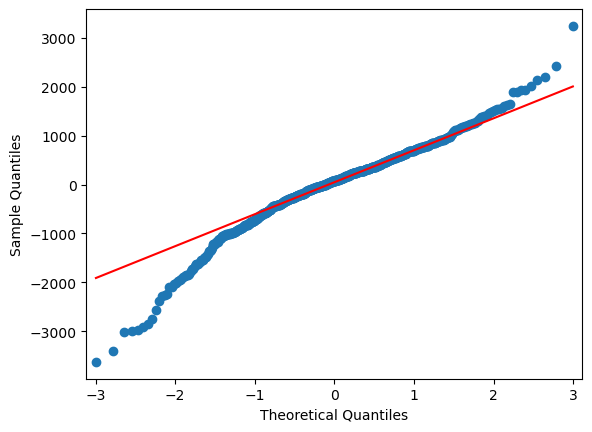

In [13]:
sm.qqplot(model_Fw.resid, line = 'q')
plt.show();

In [14]:
ks_test = kstest(model_Fw.resid, 'norm')
ks_test.pvalue

1.5514469741605275e-202

In [15]:
ks_test.pvalue < 0.05

True

Dado que el valor p tiene una significancia menor al 5%, 1.5514469741605275e-202, se rechaza la hipotesis nula, es decir, no se cumple con la hipotesis de normalidad.


## Independencia:

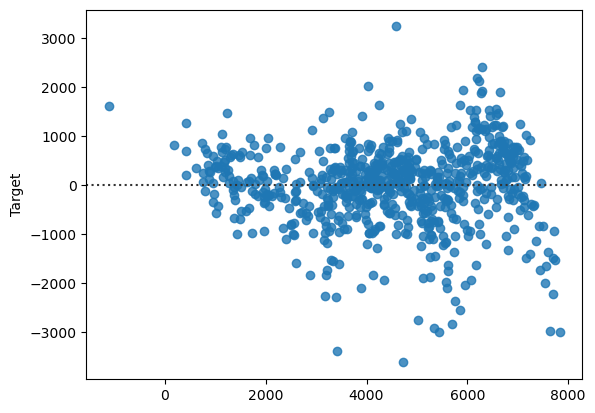

In [16]:
plot = sns.residplot(x = model_Fw.fittedvalues, y = Y)
plt.show()

Dado que el Durbin-Watson del modelo es igual a 1.082, por debajo del intervalo (1.8 - 2.2), se rechaza la hipotesis nula, por ende los residuos no son independientes.

## Igualdad de varianzas (Homocedasticidad)

In [17]:
sms.het_breuschpagan(model_Fw.resid, model_Fw.model.exog)

(51.770281205383924,
 3.000471704718087e-07,
 4.981957858317923,
 1.691972850681301e-07)

In [18]:
sms.het_breuschpagan(model_Fw.resid, model_Fw.model.exog)[1] < 0.05

True

Dado que el valor 3.000471704724065e-07 es menor a 0.05, se rechaza la hipotesis nula, de igualdad de varianza. El modelo es Heterocedástico.

## Pregunta 6:

Realice una predicción de arriendos de bicicletas para un día con las siguientes cualidades:

In [19]:
prediccion_1_raw = pd.DataFrame({'season' : 2,
                          'year' : 2021,
                          'holiday' : 'feriado',
                          'weekday' : 'Sábado',
                          'workingday' : 'No laboral',
                          'weather' : 'Niebla',
                          'temp' : 12,
                          'atemp' : 11,
                          'humidity' : 66.3,
                          'windspeed' : 12.5}, index = ['1'])

In [20]:
prediccion_1_encode = pd.DataFrame({'const': 1.0,
                             'season_2' : 1,
                             'season_3' : 0,
                             'season_4' : 0,
                             'year_1' : 1,
                             'holiday_1' : 1,
                             'weekday' : 5,
                             'workingday' : 0,
                             'weather_2' : 1,
                             'weather_3' : 0,
                             'temp' : 12,
                             'atemp' : 11,
                             'humidity' : 66.3,
                             'windspeed' : 12.5}, index = ['1'])

In [21]:
params = prediccion_1_encode[forward_selection]
params

,const,atemp,year_1,season_4,weather_3,weather_2,season_2,season_3,windspeed,humidity,holiday_1,temp
1,1.0,11,1,0,0,1,1,0,12.5,66.3,1,12


In [22]:
y_predict = model_Fw.predict(params)
y_predict

1    4462.903848
dtype: float64

Para un dia sábado, feriado, no trabajable, en la segunda temporada del año, con una temperatura de 12°C y una sensación termica de 11°C, una humedad de 66.3% y una velocidad del viento en ese dia de 12.5 mph, se arrendarían ~4.463 bicicletas.

# Pregunta 7:

* Cargue la base de datos Lluvia_full.csv.
* Codifique la variable LluviaMan como 0 y 1 para los días sin lluvia y con lluvia respectivamente. 
* Realice una separación de la base de datos en un set de entrenamiento y set de validación. Utilice una proporción de 80:20 respectivamente. Para poder replicar sus resultados, fije una semilla antes de obtener los indices. Para ello utilice la función random.seed(2023).

In [23]:
url2 = 'https://raw.githubusercontent.com/louisboza/DS_UC_Diplomado/main/Taller_1/src/Lluvia_full.csv'
dg = pd.read_csv(url2)

In [24]:
dg.head(5)

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,No,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,No,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Yes,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,No,Temperate,Invierno


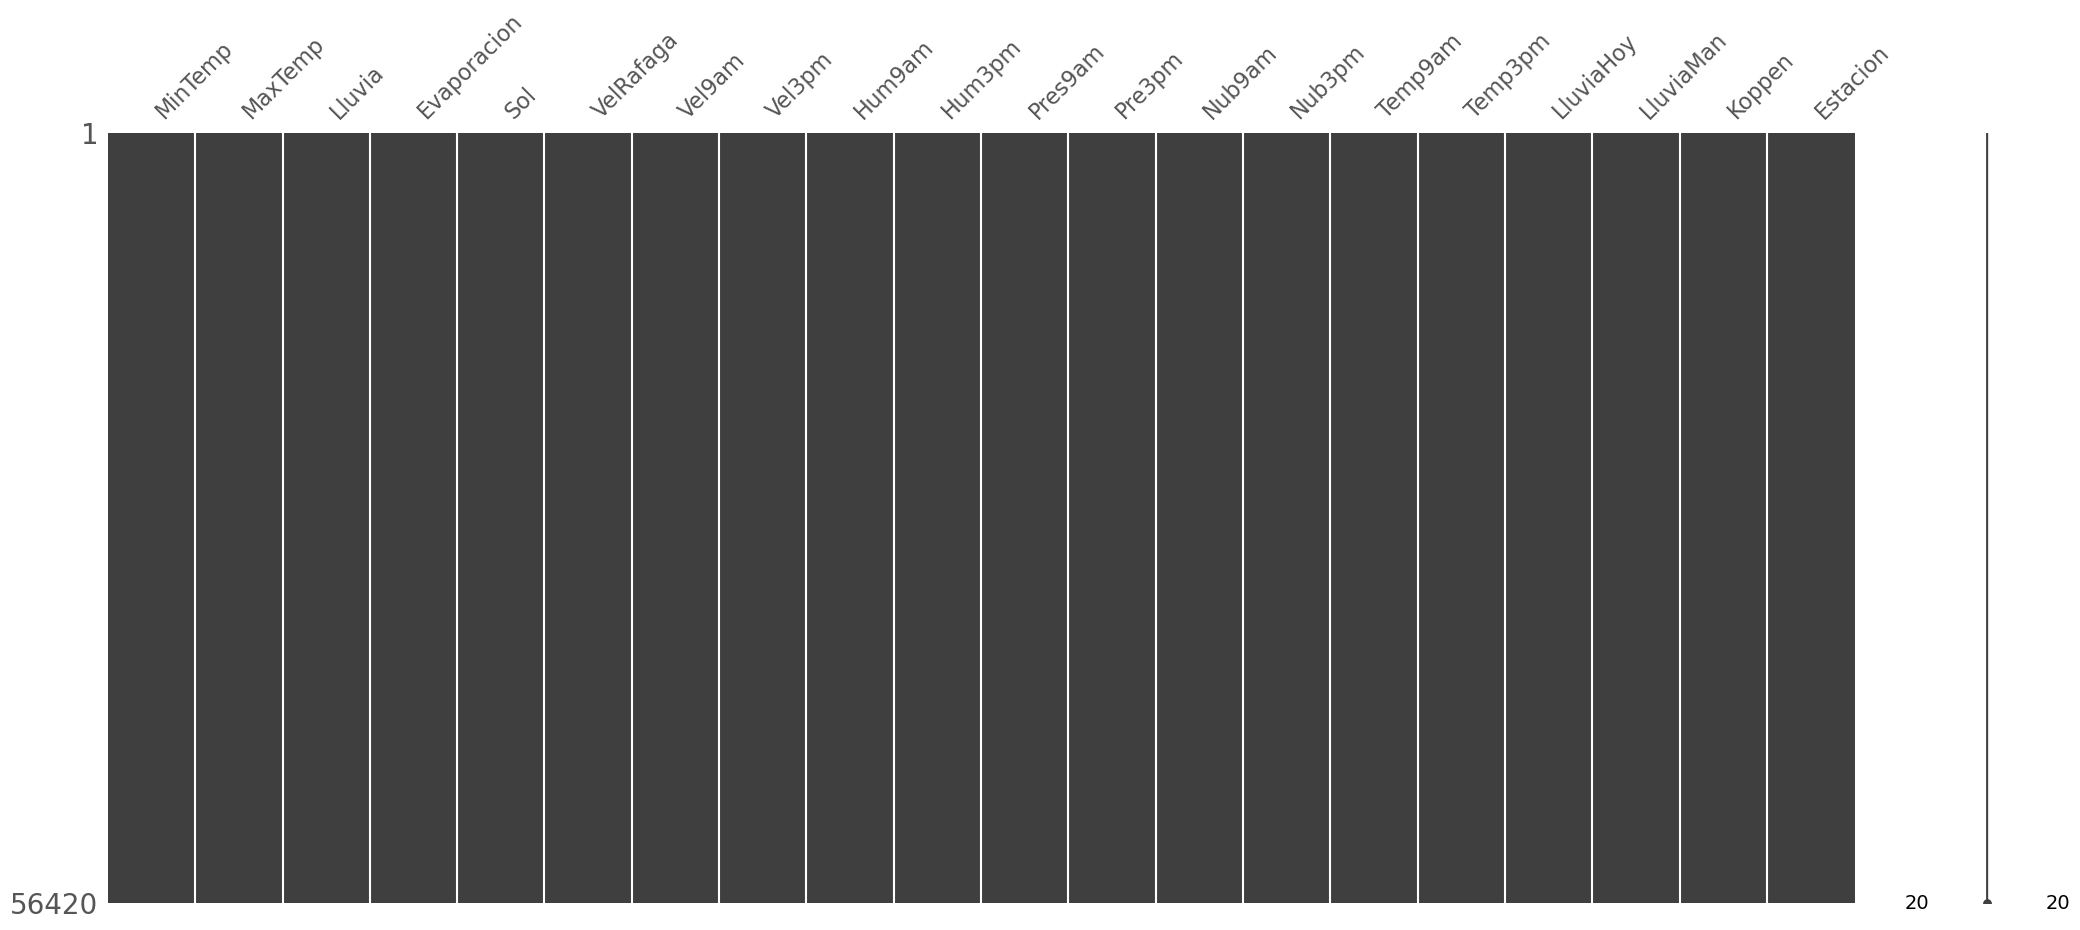

In [74]:
msno.matrix(dg)
plt.show();

In [25]:
dg['LluviaMan'] = np.where(dg['LluviaMan'] == 'Yes', 1, 0)
dg.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,0,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,0,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,0,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,1,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,0,Temperate,Invierno


In [26]:
X = dg.drop(['LluviaMan'], axis = 1)
y = dg['LluviaMan']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 2023)

# Pregunta 8:

Realice un modelo de regresión logística para predecir si lloverá mañana utilizando la variable Evaporación, ¿es este Un factor significativo? Intérprete el odd ratio de la evaporación.

In [27]:
x_train2 = X_train['Evaporacion']
x_train2 = sm.add_constant(x_train2)
x_train2.head(5)

,const,Evaporacion
31665,1.0,12.6
36405,1.0,0.2
35309,1.0,2.4
24159,1.0,2.8
27018,1.0,6.8


In [28]:
model_logit = sm.Logit(y_train, x_train2).fit()

Optimization terminated successfully.
         Current function value: 0.518724
         Iterations 6


In [29]:
model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LluviaMan   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45134
Method:                           MLE   Df Model:                            1
Date:                Wed, 09 Aug 2023   Pseudo R-squ.:                 0.01814
Time:                        10:04:47   Log-Likelihood:                -23413.
converged:                       True   LL-Null:                       -23846.
Covariance Type:            nonrobust   LLR p-value:                3.527e-190
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7298      0.021    -34.448      0.000      -0.771      -0.688
Evaporacion    -0.1030      0.004    -27.765      0.000      -0.110      -0.096
===============================================================================
"""

In [30]:
model_logit.params[1:]
round(np.exp(model_logit.params[1]), 3)

0.902

In [31]:
(round(np.exp(model_logit.params[1]), 3)-1)*100

-9.799999999999997

La evaporación es una variable significativo, puesto que su valor p es menor a 0.05.\
Esta, es un favor protector, puesto que el coeficiente en menor a 0. Además, su chance/OR es < 1.\
Por cada unidad de aumento en evaporación disminuye en un ~9.8% las chances de que llueva al día siguiente.

# Pregunta 9:

Utilizando un método automatizado, ajuste un modelo de regresión logística, utilizando la metodología de dirección both (forward y backward a la vez).

In [32]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_train.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,Koppen,Estacion,LluviaMan
31665,17.2,32.8,0.0,12.6,13.4,54.0,22.0,20.0,50.0,33.0,1012.6,1008.8,1.0,2.0,20.4,31.2,No,Temperate,Verano,0
36405,8.7,13.8,4.4,0.2,3.2,44.0,13.0,22.0,99.0,65.0,1010.2,1012.1,7.0,6.0,10.8,13.1,Yes,Temperate,Otoño,1
35309,4.3,16.6,0.0,2.4,9.4,24.0,7.0,9.0,65.0,38.0,1023.0,1020.7,3.0,2.0,11.3,16.5,No,Temperate,Invierno,0
24159,11.1,18.5,1.0,2.8,1.4,52.0,11.0,31.0,93.0,52.0,1019.4,1020.2,8.0,7.0,13.3,16.5,No,Temperate,Otoño,1
27018,10.2,15.1,14.8,6.8,5.2,67.0,15.0,37.0,74.0,45.0,1010.6,1013.6,7.0,7.0,12.5,13.0,Yes,Subtropical,Primavera,1


In [33]:
formula = 'LluviaMan ~ ' + ' + '.join(X_train.columns)
formula

'LluviaMan ~ MinTemp + MaxTemp + Lluvia + Evaporacion + Sol + VelRafaga + Vel9am + Vel3pm + Hum9am + Hum3pm + Pres9am + Pre3pm + Nub9am + Nub3pm + Temp9am + Temp3pm + LluviaHoy + Koppen + Estacion'

In [60]:
from estyp.linear_model.stepwise import both_selection
from warnings import filterwarnings
filterwarnings('ignore')

formula_resultante = both_selection(
                        formula = formula,
                        data = df_train,
                        model = LogisticRegression)

In [35]:
import statsmodels.formula.api as smf

model_logistic = smf.logit(formula_resultante, data = df_train).fit()

Optimization terminated successfully.
         Current function value: 0.332973
         Iterations 7


In [36]:
model_logistic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LluviaMan   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45113
Method:                           MLE   Df Model:                           22
Date:                Wed, 09 Aug 2023   Pseudo R-squ.:                  0.3697
Time:                        10:05:41   Log-Likelihood:                -15029.
converged:                       True   LL-Null:                       -23846.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                63.1688      2.823     22.376      0.000      57.636      68.702
LluviaHoy[T.Yes]          0.4644      0.041     11.447      0.000       0.385       0.544
Koppen[T.Grassland]      -0.0091      0.150     -0.061      0.951      -0.302       0.284
Koppen[T.Subtropical]     0.4526      0.135      3.343      0.001       0.187       0.718
Koppen[T.Temperate]       0.0450      0.135      0.334      0.738      -0.219       0.309
Estacion[T.Otoño]         0.0251      0.045      0.556      0.578      -0.063       0.113
Estacion[T.Primavera]     0.0653      0.046      1.406      0.160      -0.026       0.156
Estacion[T.Verano]       -0.2229      0.056     -3.949      0.000      -0.334      -0.112
MinTemp                  -0.0414      0.006     -6.591      0.000      -0.054      -0.029
MaxTemp                   0.0144      0.013      1.103      0.270      -0.011       0.040
Lluvia                    0.0095      0.002      4.033      0.000       0.005       0.014
Evaporacion               0.0023      0.007      0.350      0.726      -0.011       0.015
Sol                      -0.1475      0.007    -21.309      0.000      -0.161      -0.134
VelRafaga                 0.0589      0.002     33.222      0.000       0.055       0.062
Vel9am                   -0.0145      0.002     -6.165      0.000      -0.019      -0.010
Vel3pm                   -0.0227      0.002     -9.335      0.000      -0.027      -0.018
Hum9am                    0.0019      0.001      1.331      0.183      -0.001       0.005
Hum3pm                    0.0586      0.002     35.215      0.000       0.055       0.062
Pres9am                   0.1118      0.009     12.072      0.000       0.094       0.130
Pre3pm                   -0.1811      0.009    -19.559      0.000      -0.199      -0.163
Nub9am                   -0.0162      0.008     -1.908      0.056      -0.033       0.000
Nub3pm                    0.1325      0.009     14.313      0.000       0.114       0.151
Temp3pm                   0.0352      0.015      2.404      0.016       0.007       0.064
=========================================================================================
"""

# Pregunta 10:

Considerando la base de entrenamiento, ajuste la curva ROC y KS asociada al modelo, ¿Qué puede concluir sobre la discriminación del modelo?. Con la información obtenida encuentre un punto de corte que tenga una sensibilidad mínima del 80% y la máxima especificidad.

In [37]:
y_pred_train = model_logistic.predict(X_train)

In [38]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)

In [39]:
df_resume = pd.DataFrame({'Falsos positivos' : fpr,
                          'Verdaderos positivos': tpr,
                          'Umbral': thresholds})

In [40]:
df_resume[df_resume['Verdaderos positivos'] >= 0.8]

,Falsos positivos,Verdaderos positivos,Umbral
5830,0.195329,0.800000,0.213599
5831,0.195358,0.800000,0.213538
5832,0.195358,0.800301,0.213477
5833,0.195443,0.800301,0.213377
5834,0.195443,0.800401,0.213358
...,...,...,...
9325,0.976306,0.999800,0.005455
9326,0.976306,0.999900,0.005447
9327,0.982507,0.999900,0.004858
9328,0.982507,1.000000,0.004857


In [41]:
punto_corte = 0.213599

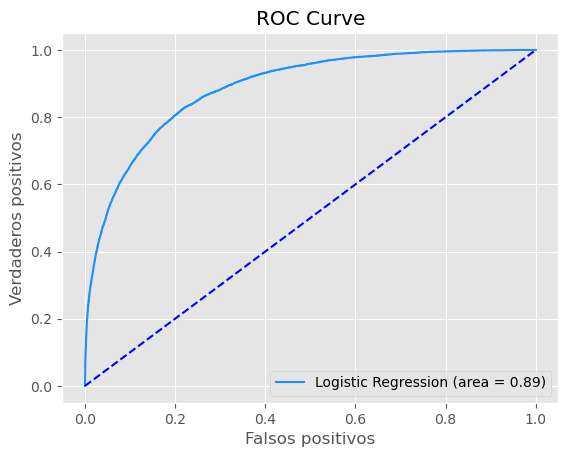

In [42]:
plt.style.use('ggplot')

logit_roc_auc = roc_auc_score(y_train, y_pred_train)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train) 
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, color = 'dodgerblue')

#plt.fill_between(fpr, tpr, color='dodgerblue')
plt.plot([0, 1], [0, 1],'b--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show();

In [43]:
y_pred_train_test = (y_pred_train > punto_corte).astype(int)

In [44]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train, y_pred_train_test, labels = [0, 1])
confusion

array([[28289,  6867],
       [ 1996,  7984]])

In [45]:
TP = confusion[1, 1] # verdaderos positivos
TN = confusion[0, 0] # verdaderos negativos
FP = confusion[0, 1]
FN = confusion[1, 0]

In [46]:
sensibilidad = TP /(TP + FN) 
print('Sensibilidad: ', sensibilidad)
especificidad = TN/(TN + FP) 
print('Especificidad: ', especificidad)
precision = TP/(TP + FP)
print('Precision: ', precision)
recall = TP/(TP + FN)
F1 = 2*(precision*recall)/(precision + recall)
print('F1 Score: ', F1)
auc = (TP + TN)/(TP + TN + FP + FN) #exactitud
print('AUC Score: ', auc)

Sensibilidad:  0.8
Especificidad:  0.8046706109910114
Precision:  0.5376068951585752
F1 Score:  0.6430671338246546
AUC Score:  0.8036378943637008


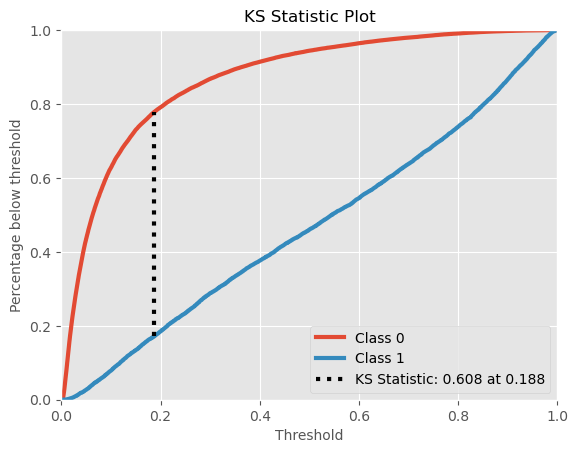

In [47]:
y_pred_train_2 = np.array(pd.concat([1-y_pred_train, y_pred_train], axis = 1))
skplt.plot_ks_statistic(y_train, y_pred_train_2)
plt.show();

# Pregunta 11:

Considerando la base de test, obtenga nuevamente la curva ROC y KS asociada al modelo, ¿cómo han variado los indicadores?, además, utilizando el punto de corte obtenido, obtenga la precisión.

In [48]:
y_pred = model_logistic.predict(X_test)
pd.DataFrame(round(y_pred, 3))

,0
14215,0.041
35351,0.544
40305,0.164
27060,0.011
17976,0.116
...,...
53304,0.031
47149,0.010
46165,0.067
42598,0.128


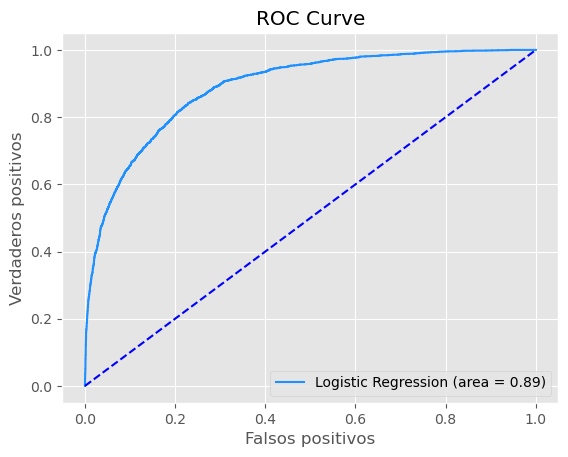

In [49]:
plt.style.use('ggplot')

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc, color = 'dodgerblue')

#plt.fill_between(fpr, tpr, color='dodgerblue')
plt.plot([0, 1], [0, 1],'b--')
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show();

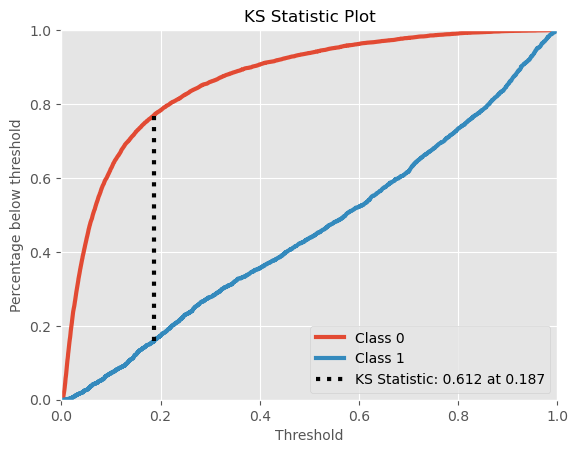

In [50]:
y_pred2 = np.array(pd.concat([1-y_pred, y_pred], axis = 1))
skplt.plot_ks_statistic(y_test, y_pred2)
plt.show();

In [51]:
y_pred_test = (y_pred > punto_corte).astype(int)

In [52]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_test, labels = [0, 1])
confusion

array([[7037, 1800],
       [ 461, 1986]])

In [53]:
TP = confusion[1, 1] # verdaderos positivos
TN = confusion[0, 0] # verdaderos negativos
FP = confusion[0, 1]
FN = confusion[1, 0]

In [54]:
sensibilidad = TP /(TP + FN) 
print('Sensibilidad: ', sensibilidad)
especificidad = TN/(TN + FP) 
print('Especificidad: ', especificidad)
precision = TP/(TP + FP)
print('Precision: ', precision)
recall = TP/(TP + FN)
F1 = 2*(precision*recall)/(precision + recall)
print('F1 Score: ', F1)
auc = (TP + TN)/(TP + TN + FP + FN) #exactitud
print('AUC Score: ', auc)

Sensibilidad:  0.8116060482223131
Especificidad:  0.7963109652597036
Precision:  0.5245641838351822
F1 Score:  0.6372533290550297
AUC Score:  0.7996277915632755


### ¿Cómo han variado los indicadores?

La Exactitud del modelo (AUC Score) ha disminuido, sin embargo, la Xensibilidad aumenta ligeramente de ~0.80 a ~0.81. Por otro lado, la especificidad ha disminuido de ~0.80 a ~0.79. Finalmente, la Precisión y el F1 Score también disminuyen levemente.

### Precisión:

In [55]:
print('Precision: ', precision)

Precision:  0.5245641838351822


# Pregunta 12:

Utilizando el punto de corte encontrado, determine si el día de mañana lloverá.

In [56]:
x_prediction = pd.DataFrame({'MinTemp' : 7,
                             'MaxTemp' : 18,
                             'Lluvia'  : 0,
                             'Evaporacion' : 7,
                             'Sol' : 12,
                             'VelRafaga' : 72,
                             'Vel9am' : 10,
                             'Vel3pm' : 54,
                             'Hum9am' : 65,
                             'Hum3pm' : 77,
                             'Pres9am' : 1001,
                             'Pre3pm' : 1025,
                             'Nub9am' : 3,
                             'Nub3pm' : 2,
                             'Temp9am' : 11.4,
                             'Temp3pm' : 16.2,
                             'LluviaHoy' : 'No',
                             'Koppen' : 'Subtropical',
                             'Estacion' : 'Primavera'}, index = ['1'])

In [57]:
y_prediction = model_logistic.predict(x_prediction)
y_prediction

1    0.026503
dtype: float64

In [58]:
y_prediction > punto_corte

1    False
dtype: bool

Dado el punto de corte, mañana no lloverá.